In [1]:
%matplotlib inline

# Cython tutorial
Andrew Hamilton, September 16, 2020

### What is Cython?

What we commonly call Python is really two different things: the **language** and the **implementation**. The Python language defines the syntax with which we write code. The most common implementation is CPython (written in C and Python), which compiles valide Python code into bytecode and then **interprets** it. 

One of the reason's for Python's popularity is its flexibility. I can define a variable ``x = 5``, divide x by 2 to get ``2.5``, and then later set ``x = 'Florida'``. In this sequence, ``x`` will have been typed as an ``int``, ``float``, and then ``str``. Python can do this for us automatically with no problem. It will automatically allocate and deallocate memory, check for type compatibility with mathematical operations, etc. 

However, this flexibility has a cost, as it requires the interpreter to handle memory, check for type compatibility, and perform a host of other tasks behind the scenes at run time. Lower-level compiled languages like C generally require the user to specify the types for variables, allocate and deallocate memory, etc. This makes them less flexible and more difficult to use, but potentially faster.

Cython is an attempt to bridge the gap by bringing some of C's qualities to Python. It is technically a separate programming language which is a superset of the Python programming language; Cython code mostly looks like Python code, but it also adds optional C-inspired syntax. Most notably, it allows us to declare **static types** when defining variables/classes/functions.

Cython can automatically translate our code into C (or C++), along with interface code that allows it to interact with CPython at run time. The C code is then **compiled**, generating CPython **extension modules**. These compiled modules can be imported and used within Python code with significantly lower overhead than the equivalent Python modules.

From the docs:

>The fundamental nature of Cython can be summed up as follows: Cython is Python with C data types.

>Cython is Python: Almost any piece of Python code is also valid Cython code. (There are a few Limitations, but this approximation will serve for now.) The Cython compiler will convert it into C code which makes equivalent calls to the Python/C API.

>But Cython is much more than that, because parameters and variables can be declared to have C data types. Code which manipulates Python values and C values can be freely intermixed, with conversions occurring automatically wherever possible. Reference count maintenance and error checking of Python operations is also automatic, and the full power of Python’s exception handling facilities, including the try-except and try-finally statements, is available to you – even in the midst of manipulating C data.``

### Fibonacci example

The first example is a simple function that will calculate the n'th Fibonacci number. I have written six different versions of the function.

In [2]:
%cd fibonacci/
! ls

C:\Users\Andrew\cython_tutorial\fibonacci
__pycache__
build
fib_cy.pyx
fib_cy_double.pyx
fib_py.py
fib_py_cy.py
fib_py_cy_double.py
fib_py_double.py
run_setups.sh
setup_fibs.py
time_versions.py


To start, here is the pure Python version, ``fib_py.py``:

In [3]:
! cat fib_py.py

### Function for finding n'th Fibonacci number. Copied from (Kurt W. Smith, "Cython", O'Reilly Media Inc., 2015).
### Pure Python version

def fib_py(n):
    a, b = 0, 1
    for i in range(n - 1):
        a, b = a + b, a
    return a


In [4]:
from fib_py import fib_py
fib_py(40)

63245986

The second version, ``fib_py_cy.py``, is the exact same as the pure Python version, but we will "Cythonize" it without making any manual changes.

The third version, ``fib_cy.py``, is a Cythonic implementation, to which we have added variable types. Note the new file ending, **.pyx**, for Cython source files.

In [5]:
! cat fib_cy.pyx

# cython: profile=True

### Function for finding n'th Fibonacci number. Copied from (Kurt W. Smith, "Cython", O'Reilly Media Inc., 2015).
### Typed Cython version

def fib_cy(int n):
    cdef int a = 0
    cdef int b = 1
    cdef int i
    for i in range(n - 1):
        a, b = a + b, a
    return a


Because of the importance of types for Cython, I have also included three more files which are equivalent to the first three, except that they use floating point numbers to count. Note that **the Python float class is equivalent to C doubles, not C floats**.

In [6]:
! cat fib_py_double.py

### Function for finding n'th Fibonacci number. Copied from (Kurt W. Smith, "Cython", O'Reilly Media Inc., 2015).
### Pure Python version

def fib_py_double(n):
    a, b = 0., 1.
    for i in range(n - 1):
        a, b = a + b, a
    return a


In [7]:
! cat fib_cy_double.pyx

### Function for finding n'th Fibonacci number. Copied from (Kurt W. Smith, "Cython", O'Reilly Media Inc., 2015).
### Typed Cython version

def fib_cy_double(int n):
    cdef double a = 0.
    cdef double b = 1.
    cdef int i
    for i in range(n - 1):
        a, b = a + b, a
    return a


Now in order to run the Cython code, we first have to **Cythonize it**. This involves two steps: translating our Python-like code into C code, and compiling the C code into an executable. If you want to recompile, first **delete all \*.so, \*.pyd, \*.c, and \*.html files from the directory**.

In [8]:
! rm *.so *.pyd *.c *.html

rm: cannot remove '*.so': No such file or directory
rm: cannot remove '*.pyd': No such file or directory
rm: cannot remove '*.c': No such file or directory
rm: cannot remove '*.html': No such file or directory


To Cythonize, we use a setup file:

In [9]:
! cat setup_fibs.py

from setuptools import setup
from Cython.Build import cythonize

setup(ext_modules = cythonize(['fib_py_cy.py', 'fib_cy.pyx', 'fib_py_cy_double.py', 'fib_cy_double.pyx'],
                                annotate=True, language_level=3))


We can run the setup in Python using the ``run_setups.sh`` file. You should give either ``python`` or ``python3`` as the command line argument, depending on which is the alias for Python 3 in your shell.

In [10]:
! cat run_setups.sh

## Shell script for running the setup function. As command line arg, give either python or python3, whichever is the command for python3 in your system

$1 setup_fibs.py build_ext --inplace


In [11]:
! sh run_setups.sh python

Compiling fib_py_cy.py because it changed.
Compiling fib_cy.pyx because it changed.
Compiling fib_py_cy_double.py because it changed.
Compiling fib_cy_double.pyx because it changed.
[1/4] Cythonizing fib_cy.pyx
[2/4] Cythonizing fib_cy_double.pyx
[3/4] Cythonizing fib_py_cy.py
[4/4] Cythonizing fib_py_cy_double.py
running build_ext
building 'fib_py_cy' extension
C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\shared" "-IC:\Program Files (x86)\Windows

Assuming this worked, you will now have the following types of files:

1. \*.c files: The C code created by Cython. This will be very long and very hard to read due to all the work Cython is doing behind the scenes to make our module interfaceable with the CPython interpreter at run time.

2. \*.so or \*.pyd files: Compiled executables from the C code. File ending depends on whether you are using a Linux/OSX (\*.so) or Windows (\*.pyd).

3. \*.html files: Annotated versions of our Cython code. Lines will be highlighted yellow based on the extent to which they have to interface with CPython. Lines with no highlighting are executed entirely in C with no interfacing overhead. We want as little yellow as possible.

Try comparing ``fib_py_cy.html`` to ``fib_cy.html`` to see the impact of adding the type information.

Now let's try running our 6 versions, using the ``time_versions.py`` script:

In [12]:
! cat time_versions.py

from fib_py import fib_py
from fib_py_cy import fib_py_cy
from fib_cy import fib_cy
from fib_py_double import fib_py_double
from fib_py_cy_double import fib_py_cy_double
from fib_cy_double import fib_cy_double
import timeit
import sys

# pass in Fib number to calculate
n = int(sys.argv[1])

# time each version
t1 = min(timeit.repeat(f"fib_py({n})", number=100000, repeat = 10, setup="from fib_py import fib_py; gc.enable()"))
print(f'Pure python: answer = {fib_py(n)}, time = {t1}, speedup = 1.0')

t = min(timeit.repeat(f"fib_py_cy({n})", number=100000, repeat = 10, setup="from fib_py_cy import fib_py_cy; gc.enable()"))
print(f'Cythonized Python: answer = {fib_py_cy(n)}, time = {t}, speedup = {t1 / t}')

t = min(timeit.repeat(f"fib_cy({n})", number=100000, repeat = 10, setup="from fib_cy import fib_cy; gc.enable()"))
print(f'Typed Cython: answer = {fib_cy(n)}, time = {t}, speedup = {t1 / t}')

t = min(timeit.repeat(f"fib_py_double({n})", number=100000, repeat = 10, setup="from fib_py_doub

We can run this to calculate the 40th Fibonacci number as follows:

In [13]:
! python time_versions.py 40

Pure python: answer = 63245986, time = 0.44908590000000004, speedup = 1.0
Cythonized Python: answer = 63245986, time = 0.15236759999999983, speedup = 2.947384483315354
Typed Cython: answer = 63245986, time = 0.00903659999999995, speedup = 49.69633490472108
Pure Python (double): answer = 63245986.0, time = 0.2763024999999999, speedup = 1.6253414283258394
Cythonized Python (double): answer = 63245986.0, time = 0.0491463999999997, speedup = 9.13771710644122
Typed Cython (double): answer = 63245986.0, time = 0.008176599999998757, speedup = 54.92330553042442


For the integer implementation, **Cython gives us a \~2x speedup without adding any type info, and \~40x speedup for the typed version! The double implementation gives a larger speedup (\~4x) for the untyped version and a smaller speedup (\~20x).** These are very large gains for very little work. 

If we try to calculate a larger Fibonacci number, we see why the integer/double distinction is important:

In [14]:
! python time_versions.py 50

Pure python: answer = 7778742049, time = 0.3792123000000003, speedup = 1.0
Cythonized Python: answer = 7778742049, time = 0.17213530000000077, speedup = 2.2029897412093775
Typed Cython: answer = -811192543, time = 0.009087100000000348, speedup = 41.730838221213126
Pure Python (double): answer = 7778742049.0, time = 0.3371652999999988, speedup = 1.124707376470834
Cythonized Python (double): answer = 7778742049.0, time = 0.05423599999999951, speedup = 6.991892838704988
Typed Cython (double): answer = 7778742049.0, time = 0.009982599999998953, speedup = 37.98732795063811


**Python integers can be unlimited size, while C integers can overflow if they get too big**. Our typed Cython integer version is wrong here because of overflow issues. This shows that the speed advantages of Cython are not free - you do lose some of the flexibility & safety of Python. We could use ``long`` instead of ``int`` to get a larger overflow threshold, but the fundamental problem would remain. We may want to introduce some manual checks into our function to make sure we don't enter an argument that is large enough to cause overflow.

### Reservoir simulation example
The Fibonacci example is a prime candidate for Cythonization: a simple function with a tight numerical loop. Once typed, this requires virtually no interaction with the CPython interpreter. 

However, many research models are more complex than this, with fewer sequential computations and more data storage & retrieval. This is especially true of object-oriented models. Such models require a bit more work to integrate with Cython, and the potential gains are lower. However, it can definitely still be worthwhile.

The second example is a simple reservoir operations model, which has an object-oriented structure that will be familiar to most water resources modelers. We have a ``Model`` class, a ``Reservoir`` class, and a ``Demand`` class. 

In [15]:
%cd ../reservoir_sim/py_fast
! ls

C:\Users\Andrew\cython_tutorial\reservoir_sim\py_fast
Demand.py
Model.py
Reservoir.py
__pycache__
main_py.py


The Model class will set up and run a simulation model with two Reservoir objects, and each Reservoir object will have a Demand object. Every day, we will generate random inflows and demands (based on a seasonal trend plus noise), and make water deliveries and reservoir releases based on seasonal minimum flow requirements. 

In [16]:
! cat Demand.py

### Demand class - pure Python
from random import gauss
from math import pi, sin

class Demand():
  def __init__(self, name, demand_params):
    self.name = name
    # amplitude, phase, shift, & noise std for sine wave of demands
    self.demand_amp, self.demand_phase, self.demand_shift, self.demand_noise = demand_params
    # save 2pi/365 to save conversion time
    self.days_to_radians = 2. * pi / 365.

  ### demand function
  def demand_t(self, t):
    noise = gauss(0., self.demand_noise)
    demand_t = self.demand_amp * sin((t - self.demand_phase)  * self.days_to_radians) + self.demand_shift + noise
    return demand_t



In [17]:
! cat Reservoir.py

### Reservoir class - pure Python
from random import gauss
from math import pi, sin
from Demand import Demand

class Reservoir():
  def __init__(self, name, inflow_params, min_flow_params, demand_params, storage_params):
    self.name = name
    # amplitude, phase, shift, & noise std for sine wave of inflows
    self.inflow_amp, self.inflow_phase, self.inflow_shift, self.inflow_noise = inflow_params
    # amplitude, phase, and shift for sine wave of minimum flows
    self.min_flow_amp, self.min_flow_phase, self.min_flow_shift = min_flow_params
    # reservoir capacity and initial storage
    self.capacity, self.storage = storage_params
    # set up demand object
    self.demand = Demand(name, demand_params)
    # save 2pi/365 to save conversion time
    self.days_to_radians = 2. * pi / 365.

  ### inflow function
  def inflow_t(self, t):
    noise = gauss(0., self.inflow_noise)
    inflow_t = self.inflow_amp * sin((t - self.inflow_phase)  * self.days_to_radians) + self.inflow_shift + n

In [18]:
! cat Model.py

### Model class for running simulation
import matplotlib.pyplot as plt
import random
import numpy as np
from Reservoir import Reservoir

class Model():
  def __init__(self, years, plot, seed):
    # length of simulation (no leap years)
    self.years = years
    self.days = 365 * self.years
    # boolean for whether to plot
    self.plot = plot
    # random seed
    random.seed(seed)

    ### set up upper reservoir
    # inflow params in terms of sinusoid, (amplitude, phase, shift, noise). units = AF/day
    inflow_params = (300., 0., 500., 20.)
    # min flow params in terms of sinusoid, (amplitude, phase, shift). units = AF/day
    min_flow_params = (200., 122., 300.)
    # demand params in terms of sinusoid, (amplitude, phase, shift, noise). units = AF/day
    demand_params = (300., 163., 600., 30.)
    # storage params (capacity, starting storage). units = AF
    storage_params = (500000., 250000.)
    # initialize upper reservoir
    self.reservoir_upper = Reservoir('upper', inflo

The main_py function runs the simulation.

In [19]:
! cat main_py.py


    plt.show()



### main file to run simulation
from Model import Model

# initialize model
model = Model(years = 5, plot = True, seed = 101)

# run simulation
tot_storage = model.run()
print(tot_storage)

# plot results
if model.plot:
  model.plot_results()



12066.330987273821


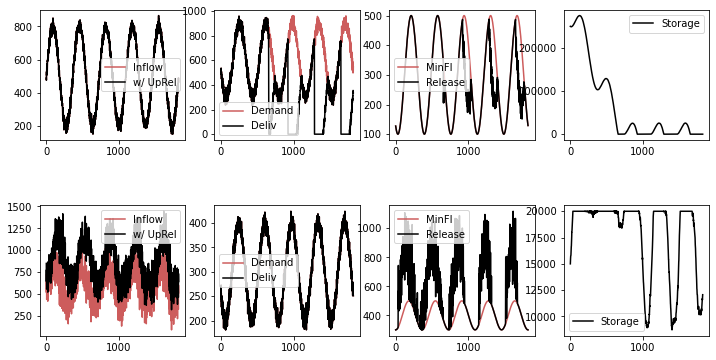

In [20]:
from Model import Model

# initialize model
model = Model(years = 5, plot = True, seed = 101)

# run simulation
tot_storage = model.run()
print(tot_storage)

# plot results
if model.plot:
  model.plot_results()

In [21]:
%cd ../

C:\Users\Andrew\cython_tutorial\reservoir_sim


I have written 7 different versions of the model.

1. py_slow: This was my first attempt at the simulation model, which is relatively slow due to the use of NumPy functions (random.normal, sin, pi) as opposed to the simpler versions in the random and math modules. I left this in to show that often the bottlenecks are simple things that can be fixed with purely Pythonic solutions - fixing these small things made a larger difference for this code than any Cythonization.

2. py_fast: Pure Python version after switching modules as described above.

3. py_cy: Same code as #2, but we will Cythonize the code without making any other changes.

4. numpy: Same as #2, but using NumPy rather than dictionaries/lists for storing output data

5. cy: (Mostly) typed Cythonic implementation.

6. cy_numpy: Same as #5, but using NumPy plus memoryviews for storing output data.

7. cy_numpy_noCheck: Same as #6, but with bounds checking and wraparounds disabled strategically.

You can Cythonize all relevant files and time all six versions using the command ``sh time_versions.sh python`` (or ``python3``). 

In [22]:
! cat time_versions.sh

command=$1
years=50
trials=3
repeat=10

for dir in 'py_cy' 'cy' 'cy_numpy' 'cy_numpy_noCheck'
do
	cd $dir
	$1 setup.py build_ext --inplace
	cd ../
done
echo 
echo 
echo 'Starting timings'
for dir in 'py_slow' 'py_fast' 'py_cy' 'cy' 'numpy' 'cy_numpy' 'cy_numpy_noCheck'
do
	cd $dir
	cp ../time_sim.py .
	$1 time_sim.py $years $trials $repeat $dir
	rm time_sim.py
	cd ../
done


In [23]:
# delete old builds so we can re-cythonize
! rm */*.so */*.pyd */*.c */*.html

rm: cannot remove '*/*.so': No such file or directory
rm: cannot remove '*/*.pyd': No such file or directory
rm: cannot remove '*/*.c': No such file or directory
rm: cannot remove '*/*.html': No such file or directory


In [24]:
! sh time_versions.sh python

Compiling Model.py because it changed.
Compiling Reservoir.py because it changed.
Compiling Demand.py because it changed.
[1/3] Cythonizing Demand.py
[2/3] Cythonizing Model.py
[3/3] Cythonizing Reservoir.py
running build_ext
building 'Model' extension
C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\um" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\winrt" "-IC:\Pr

[2/4] Cythonizing Model.pyx
[3/4] Cythonizing Reservoir.pyx
[4/4] Cythonizing main_cy_numpy.pyx
running build_ext
building 'main_cy_numpy' extension
C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\bin\HostX86\x64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include -IC:\Users\Andrew\anaconda3\envs\.venv_cython\include "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\ATLMFC\include" "-IC:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\um" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\winrt" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.19041.0\cppwinrt" -IC:\GTK\INCLUDE -IC:\GTK\INCLUDE\GTK-2

C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /DLL /MANIFEST:EMBED,ID=2 /MANIFESTUAC:NO /LIBPATH:C:\Users\Andrew\anaconda3\envs\.venv_cython\libs /LIBPATH:C:\Users\Andrew\anaconda3\envs\.venv_cython\PCbuild\amd64 "/LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\ATLMFC\lib\x64" "/LIBPATH:C:\Program Files (x86)\Microsoft Visual Studio\2019\Community\VC\Tools\MSVC\14.27.29110\lib\x64" "/LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.19041.0\ucrt\x64" "/LIBPATH:C:\Program Files (x86)\Windows Kits\10\lib\10.0.19041.0\um\x64" /LIBPATH:C:\GTK\LIB /EXPORT:PyInit_Demand build\temp.win-amd64-3.7\Release\Demand.obj /OUT:build\lib.win-amd64-3.7\Demand.cp37-win_amd64.pyd /IMPLIB:build\temp.win-amd64-3.7\Release\Demand.cp37-win_amd64.lib
   Creating library build\temp.win-amd64-3.7\Release\Demand.cp37-win_amd64.lib and object build\temp.win-amd64-